#Classification of tweets(disaster or not)


In [1]:
#Downloading a dataset
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2022-03-01 15:06:43--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-03-01 15:06:43 (134 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [2]:
import zipfile

zip_ref = zipfile.ZipFile("nlp_getting_started.zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
#Lets understand the data
import pandas as pd

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
sub = pd.read_csv("/content/sample_submission.csv")

In [4]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [5]:
test_df.sample(5)

,id,keyword,location,text
252,821,battle,NaN,I liked a @YouTube video from @sharpino1990 ht...
2223,7422,obliterated,USA,the 301+ feature on YouTube has been obliterat...
85,292,ambulance,"West Chester, PA",Why should a helicopter ambulance ride to tran...
1689,5708,floods,Australia,#WorldVision is responding to floods in #India...
2438,8151,rescuers,Worldwide,VIDEO: 'We're picking up bodies from water': R...


In [6]:
sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


There is no target column for the test dataset that is we are going to predict

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
import random

random_index = random.randint(0, len(train_df)-5) #Not more than trainable columns

for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
   _, text, target = row
   print(f'Target :{target}', "real_disater" if target >0 else "not a disaster")
   print(f'Text:\n{text}\n')
   print("---\n")


Target :1 real_disater
Text:
Virgin galactic crash: early unlocking of brakes triggered structural failure - Irish Examiner http://t.co/ocMCvfDZkv

---

Target :0 not a disaster
Text:
Would have just flattened the little midget ?? https://t.co/BhufevaGPu

---

Target :0 not a disaster
Text:
The Sharper Image Viper 24' Hardside Twister (Black) http://t.co/FXk3zsj2PE

---

Target :0 not a disaster
Text:
The @rbcinsurance quote website = disaster. Tried 3 browsers &amp; 3 machines. Always get 'Missing Info' error due to a non-existant drop down.

---

Target :1 real_disater
Text:
4 dead dozens injured in Gaza blast near house leveled in summer war - Washington Post  http://t.co/AXXDCaKzTY #World

---



In [10]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [11]:
from sklearn.model_selection import train_test_split

train_sentence, val_sentence, train_label, val_label = train_test_split(train_df_shuffled["text"],
                                                                           train_df_shuffled["target"],
                                                                           random_state=42,
                                                                           test_size=0.1)

In [12]:
len(train_sentence), len(train_label), len(val_sentence), len(val_label)

(6851, 6851, 762, 762)

In [13]:
train_sentence[:5], train_label[:5]

(5921    @mogacola @zamtriossu i screamed after hitting...
 3904              Imagine getting flattened by Kurt Zouma
 2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
 3718    @shakjn @C7 @Magnums im shaking in fear he's g...
 1667    Somehow find you and I collide http://t.co/Ee8...
 Name: text, dtype: object, 5921    0
 3904    0
 2804    1
 3718    0
 1667    0
 Name: target, dtype: int64)

In [14]:
#Average number of tokens in the train_sentence
round(sum([len(i.split()) for i in train_sentence])/len(train_sentence))

15

##Tokenization

In [15]:
import tensorflow as tf

#Creating a preprocessing layer
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, #unique word in a vocabulary
                                                 output_sequence_length=15, #Average number of token in a sentence
                                                 output_mode="int")

If you want to know more about the Preprocessing of the just under go the tensorflow documentation

In [16]:
#Fitting
text_vectorizer.adapt(train_sentence)

In [17]:
#Checking with the sample text
sent = "i like to code"
print(sent)
text_vectorizer([sent])

i like to code


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[ 8, 25,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [18]:
#Checking with random sentence in train data
import random
print("Sentence")
random_sentence = random.choice(train_sentence)
print(random_sentence)
print("\nTokenized sentence:")
text_vectorizer([random_sentence])

Sentence
WHELEN MODEL 295SS-100 SIREN AMPLIFIER POLICE EMERGENCY VEHICLE - Full read by eBay http://t.co/A5iwUS8EVQ http://t.co/gI82N2JuWn

Tokenized sentence:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[6810, 3616,    1,  760,    1,   77,   73,  869,  120,  193,   18,
         462,    1,    1,    0]])>

In [19]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5],
bottom_5_words = words_in_vocab[-5:]
print(len(words_in_vocab))
print(top_5_words)
print(bottom_5_words)

10000
(['', '[UNK]', 'the', 'a', 'in'],)
['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


Tokenisation is ready now go for the embedding

##Embedding

In [20]:
max_vocab_length = len(words_in_vocab)
max_vocab_length

10000

In [21]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000,
                                      output_dim=128,
                                      embeddings_initializer='uniform',
                                      input_length=15)

In [22]:
#Sample Embedding
print("Sentence")
random_sentence = random.choice(train_sentence)
print(random_sentence)
print("\nTokenized sentence:")
print(text_vectorizer([random_sentence]))
print("\nEmbeddized sentence")
embedding(text_vectorizer([random_sentence]))

Sentence
Bleachers' entire set has been one big game of The Stage Is Lava http://t.co/CLlWUD4Wsu

Tokenized sentence:
tf.Tensor(
[[   1  855  284   41   59   61  335  397    6    2 1469    9  434    1
     0]], shape=(1, 15), dtype=int64)

Embeddized sentence


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.04716439, -0.0056702 ,  0.03473802, ..., -0.01200248,
          0.04970363,  0.03141873],
        [-0.04959321,  0.02624598,  0.04055406, ..., -0.00861622,
         -0.02090775,  0.0047941 ],
        ...,
        [-0.00971986, -0.02521675,  0.0476667 , ..., -0.01575224,
         -0.02323748,  0.04266054],
        [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [23]:
embedding(text_vectorizer([random_sentence])).shape

TensorShape([1, 15, 128])

##Modelling a text data

Going to seven different model and take the best performing model

###Basic model

In [24]:
#Geting a base line model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfid",TfidfVectorizer()),#Convert text to word
                    ("clf", MultinomialNB()) #Classification model
                  ])

model_0.fit(train_sentence, train_label)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
#Base line model score
print(f'Our baseline model score is: {model_0.score(val_sentence, val_label)*100:.2f}%')

Our baseline model score is: 79.27%


In [26]:
#Prediction
baseline_pred = model_0.predict(val_sentence)
baseline_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [28]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true, y_pred, average='weighted')#we use _ to avoid support package not to unpack
  model_result = {
      "model_accuracy":model_accuracy,
      "precision":model_precision,
      "recall":model_recall,
      "f1_score":model_f1}
      
  return model_result


In [29]:
model_0_results = calculate_results(y_true=val_label,y_pred=baseline_pred)
model_0_results

{'f1_score': 0.7862189758049549,
 'model_accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

###Simple dense model

In [30]:
#Evaluate the model in the tensorboard
import datetime
def create_tensorborad_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving tensorboard log files to {log_dir}')
  return tensorboard_callback

In [31]:
#Global variable to look into various model we are going to built
SAVE_DIR = "model_log"

In [32]:
# Build model with the Functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")#Innputs are 1 dimensional strings
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)#Dimentionality reduction layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [33]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [34]:
#Model compiling
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics="accuracy")

In [35]:
#Model_fitting
history_1 = model_1.fit(train_sentence, 
                        train_label,
                        epochs=5,
                        validation_data=(val_sentence, val_label),
                        callbacks=[create_tensorborad_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving tensorboard log files to model_log/simple_dense_model/20220301-150647
Epoch 1/5
215/215 [==============================] - 6s 21ms/step - loss: 0.6094 - accuracy: 0.6916 - val_loss: 0.5357 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4410 - accuracy: 0.8189 - val_loss: 0.4691 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3463 - accuracy: 0.8605 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.4641 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4767 - val_accuracy: 0.7874


In [36]:
dense_pred_prob = model_1.predict(val_sentence)
dense_pred_prob[:10], dense_pred_prob.shape

(array([[0.40488204],
        [0.7443311 ],
        [0.997895  ],
        [0.10889998],
        [0.11143529],
        [0.93556094],
        [0.9134594 ],
        [0.99253446],
        [0.9715681 ],
        [0.26570344]], dtype=float32), (762, 1))

In [37]:
dense_pred = tf.squeeze(tf.round(dense_pred_prob))
dense_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [38]:
model_1_results = calculate_results(y_true=val_label,
                  y_pred=dense_pred)
model_1_results

{'f1_score': 0.7846966492209201,
 'model_accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

In [39]:
model_0_results

{'f1_score': 0.7862189758049549,
 'model_accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

We can create a function function to compare the model result we built and check whether the model beats base line model or not.

In [40]:
def compare_results(base_model, new_model):

  for key, value in base_model.items():
    print(f'Baseline {key} : {value:.2f}, new {key}: {new_model[key]:.2f}, difference{new_model[key]-value:.2f}')
    
compare_results(model_0_results, model_1_results)

Baseline model_accuracy : 79.27, new model_accuracy: 78.74, difference-0.52
Baseline precision : 0.81, new precision: 0.79, difference-0.02
Baseline recall : 0.79, new recall: 0.79, difference-0.01
Baseline f1_score : 0.79, new f1_score: 0.78, difference-0.00


###Recurrent neural network

####LSTM(Lomg short term memory cell)

we are going to create a new embeding layer for each model because it leared the pattern It may lead to data leakage, that not the case for vectorized layer.

In [41]:
#Model building using functional api
tf.random.set_seed(42)

from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=15,
                                     name="embedding_2")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

In [42]:
#Compiling a model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [43]:
#Fitting a model
history_1 = model_2.fit(train_sentence, 
                        train_label,
                        epochs=5,
                        validation_data=(val_sentence, val_label),
                        callbacks=[create_tensorborad_callback(dir_name=SAVE_DIR,
                                                               experiment_name="LSTM")])

Saving tensorboard log files to model_log/LSTM/20220301-150731
Epoch 1/5
215/215 [==============================] - 13s 39ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


In [44]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [45]:
model_2_pred_prob = model_2.predict(val_sentence)
model_2_pred_prob[:10]

array([[0.00712615],
       [0.7873689 ],
       [0.9996376 ],
       [0.05679163],
       [0.00258216],
       [0.99962384],
       [0.9217019 ],
       [0.9997994 ],
       [0.99949545],
       [0.66457486]], dtype=float32)

In [46]:
model_2_pred = tf.squeeze(tf.round(model_2_pred_prob))
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [47]:
model_2_results = calculate_results(y_true=val_label, y_pred=model_2_pred)
model_2_results

{'f1_score': 0.7489268622514025,
 'model_accuracy': 75.06561679790026,
 'precision': 0.7510077975908164,
 'recall': 0.7506561679790026}

In [48]:
compare_results(model_0_results, model_2_results)

Baseline model_accuracy : 79.27, new model_accuracy: 75.07, difference-4.20
Baseline precision : 0.81, new precision: 0.75, difference-0.06
Baseline recall : 0.79, new recall: 0.75, difference-0.04
Baseline f1_score : 0.79, new f1_score: 0.75, difference-0.04


#### GRU(Gated recurrent units)

In [49]:
model_3_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=15,
                                     name="GRU_embedding")

model_3 = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs,name = "model_3_gru")

In [50]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 GRU_embedding (Embedding)   (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [51]:
model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
#Fitting a model
history_3 = model_3.fit(train_sentence, train_label,
                        epochs=5,
                        validation_data=(val_sentence, val_label),
                        callbacks = [create_tensorborad_callback(dir_name=SAVE_DIR,experiment_name="GRU")])

Saving tensorboard log files to model_log/GRU/20220301-150818
Epoch 1/5
215/215 [==============================] - 10s 30ms/step - loss: 0.5221 - accuracy: 0.7338 - val_loss: 0.4553 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3179 - accuracy: 0.8694 - val_loss: 0.4910 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2189 - accuracy: 0.9168 - val_loss: 0.5601 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1586 - accuracy: 0.9442 - val_loss: 0.6028 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1194 - accuracy: 0.9591 - val_loss: 0.6109 - val_accuracy: 0.7690


In [53]:
model_3_pred_prob = model_3.predict(val_sentence)
model_3_pred_prob[:10]

array([[0.31387585],
       [0.8587818 ],
       [0.9971309 ],
       [0.12917641],
       [0.01690739],
       [0.99028003],
       [0.7495646 ],
       [0.9977126 ],
       [0.99715465],
       [0.599722  ]], dtype=float32)

In [54]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_prob))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [55]:
model_3_results = calculate_results(y_true = val_label, y_pred = model_3_pred)
model_3_results

{'f1_score': 0.7684200226242667,
 'model_accuracy': 76.9028871391076,
 'precision': 0.7686779209417003,
 'recall': 0.7690288713910761}

In [56]:
compare_results(base_model=model_0_results, new_model=model_3_results)

Baseline model_accuracy : 79.27, new model_accuracy: 76.90, difference-2.36
Baseline precision : 0.81, new precision: 0.77, difference-0.04
Baseline recall : 0.79, new recall: 0.77, difference-0.02
Baseline f1_score : 0.79, new f1_score: 0.77, difference-0.02


From the above result our base model perform better than our simple RNN model

####Bidirectional RNN model

In [57]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=15,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")


In [58]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [59]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [60]:
history_4 = model_4.fit(train_sentence,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label),
                              callbacks=[create_tensorborad_callback(SAVE_DIR, "bidirectional_RNN")])

Saving tensorboard log files to model_log/bidirectional_RNN/20220301-150850
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.5093 - accuracy: 0.7481 - val_loss: 0.4606 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 6s 30ms/step - loss: 0.3135 - accuracy: 0.8708 - val_loss: 0.5144 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.2150 - accuracy: 0.9178 - val_loss: 0.5626 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1523 - accuracy: 0.9469 - val_loss: 0.6365 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.1083 - accuracy: 0.9639 - val_loss: 0.6509 - val_accuracy: 0.7664


In [61]:
model_4_pred_prob = model_4.predict(val_sentence)
model_4_pred_prob[:10]

array([[0.04000095],
       [0.82792675],
       [0.99842227],
       [0.13531172],
       [0.00311336],
       [0.9922074 ],
       [0.9552848 ],
       [0.9994564 ],
       [0.99898285],
       [0.28141806]], dtype=float32)

In [62]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_prob))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_4_results = calculate_results(val_label, model_4_pred)
model_4_results

{'f1_score': 0.7651213533864446,
 'model_accuracy': 76.64041994750657,
 'precision': 0.7665895370389821,
 'recall': 0.7664041994750657}

In [64]:
compare_results(model_0_results, model_4_results)

Baseline model_accuracy : 79.27, new model_accuracy: 76.64, difference-2.62
Baseline precision : 0.81, new precision: 0.77, difference-0.04
Baseline recall : 0.79, new recall: 0.77, difference-0.03
Baseline f1_score : 0.79, new f1_score: 0.77, difference-0.02


Our base line model model beats this

### Convolutional neural network(text)

In [65]:
from logging import Filter
model_5_embedding = layers.Embedding(
    input_dim=10000,
    output_dim=128,
    input_length=15,
    embeddings_initializer='uniform')

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name = "Conv_layer")

In [66]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [67]:
history_5 = model_5.fit(train_sentence, train_label,
            epochs=5,
            validation_data = (val_sentence, val_label),
            callbacks = create_tensorborad_callback(SAVE_DIR, "Conv1D"))

Saving tensorboard log files to model_log/Conv1D/20220301-150929
Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.2548 - accuracy: 0.9056 - val_loss: 0.5625 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1850 - accuracy: 0.9289 - val_loss: 0.6469 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1507 - accuracy: 0.9415 - val_loss: 0.7265 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1269 - accuracy: 0.9491 - val_loss: 0.8093 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1071 - accuracy: 0.9552 - val_loss: 0.8970 - val_accuracy: 0.7769


In [68]:
model_5.summary()

Model: "Conv_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [69]:
model_5_pred_prob = model_5.predict(val_sentence)
model_5_pred_prob[:5]

array([[1.5910488e-01],
       [7.6208580e-01],
       [9.9999201e-01],
       [1.1086166e-02],
       [2.3806095e-04]], dtype=float32)

In [70]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_prob))
model_5_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [71]:
model_5_results = calculate_results(val_label, model_5_pred)
model_5_results

{'f1_score': 0.7754662769426549,
 'model_accuracy': 77.69028871391076,
 'precision': 0.7775711689884918,
 'recall': 0.7769028871391076}

In [72]:
compare_results(model_0_results, model_5_results)

Baseline model_accuracy : 79.27, new model_accuracy: 77.69, difference-1.57
Baseline precision : 0.81, new precision: 0.78, difference-0.03
Baseline recall : 0.79, new recall: 0.78, difference-0.02
Baseline f1_score : 0.79, new f1_score: 0.78, difference-0.01


###Transfer learning

In [73]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

embed_sent = embed([sent,
                    "Arun name is bladder"])

print(embed_sent)

tf.Tensor(
[[ 0.03411834 -0.06313355  0.05836159 ... -0.09065191  0.06365661
  -0.01035774]
 [ 0.06516712  0.03573716 -0.04673029 ... -0.013871   -0.02101432
  -0.08047058]], shape=(2, 512), dtype=float32)


In [74]:
embed_sent[0][:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 0.03411834, -0.06313355,  0.05836159, -0.02041427,  0.04240814,
       -0.04294033, -0.08348133, -0.00718279,  0.08543898, -0.01913861,
        0.04516429, -0.03747992,  0.02154562,  0.04965749,  0.07272653,
        0.09479693,  0.00524119, -0.00743854, -0.03929867, -0.03641413,
       -0.03280427,  0.02224875,  0.05618082,  0.01514146, -0.03888524,
        0.03661403,  0.01330377, -0.03666   ,  0.04529512, -0.03976945,
       -0.02078629,  0.09346993, -0.0033771 ,  0.00413525, -0.00122189,
       -0.01647419, -0.02451797,  0.0353347 , -0.04774126, -0.01492279,
        0.02767795,  0.0365351 ,  0.02589914, -0.0198499 , -0.00891015,
        0.0254446 , -0.04706654,  0.01035947,  0.04176975, -0.0677413 ],
      dtype=float32)>

In [75]:
embed_sent[0].shape

TensorShape([512])

In [76]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                input_shape=[],
                                dtype="string",
                                trainable=False,
                                name="USE")

In [77]:
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
                               ],name="USE")

model_6.compile(loss="binary_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [78]:
history_6 = model_6.fit(train_sentence,
                        train_label,
                        epochs=5,
                        validation_data=(val_sentence, val_label),
                        callbacks = create_tensorborad_callback(SAVE_DIR, "Transfer_learning_USE"))

Saving tensorboard log files to model_log/Transfer_learning_USE/20220301-151008
Epoch 1/5
215/215 [==============================] - 8s 15ms/step - loss: 0.4995 - accuracy: 0.7847 - val_loss: 0.4472 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4143 - accuracy: 0.8158 - val_loss: 0.4366 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3998 - accuracy: 0.8222 - val_loss: 0.4327 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3928 - accuracy: 0.8263 - val_loss: 0.4282 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3867 - accuracy: 0.8286 - val_loss: 0.4297 - val_accuracy: 0.8123


In [79]:
model_6_pred_prob = model_6.predict(val_sentence)
model_6_pred_prob[:5]

array([[0.1569379 ],
       [0.750527  ],
       [0.988123  ],
       [0.21373719],
       [0.7277446 ]], dtype=float32)

In [80]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_prob))
model_6_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [81]:
model_6_results = calculate_results(val_label, model_6_pred)
model_6_results

{'f1_score': 0.81078947666798,
 'model_accuracy': 81.23359580052494,
 'precision': 0.8145687227271431,
 'recall': 0.8123359580052494}

In [82]:
compare_results(model_0_results, model_6_results)

Baseline model_accuracy : 79.27, new model_accuracy: 81.23, difference1.97
Baseline precision : 0.81, new precision: 0.81, difference0.00
Baseline recall : 0.79, new recall: 0.81, difference0.02
Baseline f1_score : 0.79, new f1_score: 0.81, difference0.02


By far the performance of the transfer learning is best when comparing to other model

In [83]:
#Put all the evaluation metrics in a data frame 

df = pd.DataFrame({
    "Base_model":model_0_results,
    "simple_dense":model_1_results,
    "LSTM": model_2_results,
    "GRU":model_3_results,
    "Bidirectional_RNN":model_4_results,
    "CNN":model_5_results,
    "Tranfer_learning":model_6_results
    })

In [84]:
df

,Base_model,simple_dense,LSTM,GRU,Bidirectional_RNN,CNN,Tranfer_learning
model_accuracy,79.265092,78.740157,75.065617,76.902887,76.640420,77.690289,81.233596
precision,0.811139,0.791492,0.751008,0.768678,0.766590,0.777571,0.814569
recall,0.792651,0.787402,0.750656,0.769029,0.766404,0.776903,0.812336
f1_score,0.786219,0.784697,0.748927,0.768420,0.765121,0.775466,0.810789


In [85]:
df1 = df.transpose()

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
#We divide model_accuracy with 100 ,because of our understanding previously multiplied with 100
df1["model_accuracy"] = df1["model_accuracy"]/100

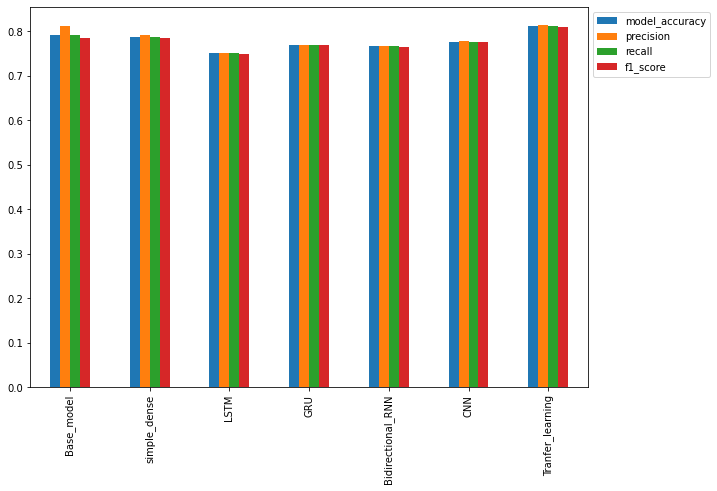

In [88]:
#df1.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))
df1.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

##Saving a model

In [89]:
model_6.save("Model_6")

INFO:tensorflow:Assets written to: Model_6/assets


INFO:tensorflow:Assets written to: Model_6/assets


In [92]:
model_6.evaluate(val_sentence, val_label)

24/24 [==============================] - 0s 13ms/step - loss: 0.4297 - accuracy: 0.8123


[0.4297267198562622, 0.8123359680175781]

In [90]:
loaded_model = tf.keras.models.load_model("Model_6")

In [94]:
loaded_model.evaluate(val_sentence, val_label)

24/24 [==============================] - 2s 12ms/step - loss: 0.4297 - accuracy: 0.8123


[0.4297267198562622, 0.8123359680175781]

In [95]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


##Checking with test data

In [137]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [138]:
test_sentence = test_df["text"]

In [139]:
test_pred = tf.squeeze(tf.round(model_6.predict(test_sentence)))
test_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [140]:
import numpy as np
test_pred = np.round(test_pred).astype(int).reshape(3263)
test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [141]:
sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [142]:
sub_df =pd.DataFrame({"id":test_df["id"], "target": test_pred} )
sub_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [143]:
sub_df.to_csv("submission.csv", index=False)